In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme()
sns.set_palette('deep')

In [2]:
fn = lambda s: s[4:] if s.startswith("dis_") else s


fn('dis_train_2.jpg')

'train_2.jpg'

In [3]:
# folder = Path("/home/mayajas/Documents/project-03-LaminarMooney/data/Prolific/data_exp_132474-v8")
folder = Path.cwd()
files = [f for f in folder.glob("*.csv")]

df = pd.DataFrame()
display_counts = []
names = []

for f in files:
    df_raw = pd.read_csv(f)
    display_counts.append(df_raw.display.value_counts())
    names.append(df_raw["Participant Public ID"].dropna().unique().item())

    #df_raw.loc[(df_raw["answer"] == 'body(animal)'), 'answer'] = 'body (animal)' # fix typo

    df_s = (df_raw
            .loc[:, ['randomiser-bv5x','Participant Public ID','Zone Name','Screen Name', 'display','Trial Number','image','answer','Response','Reaction Time', 'Correct','Incorrect']]
            #.drop(df_raw[df_raw["Zone Name"] == "timer"].index) # drop timer info
            .drop(df_raw[~df_raw["Screen Name"].isin(["Mooney", "grayscale"])].index) # keep trial screens only
            #.assign(correct=lambda x: x.apply(lambda y: 1 if y['answer'] == y['Response'] else 0, axis=1))
            .assign(image=lambda x: x["image"].apply(lambda s: s[4:] if s.startswith("dis_") else s))
            .assign(keyword=lambda x: x["image"].apply(lambda s: s.split("_")[0]))            
        )
    df = pd.concat([df, df_s], ignore_index=True)

df.rename(columns={'Participant Public ID': 'PID', 
                   'randomiser-bv5x': 'group',
                   'answer': 'category',
                   'image': 'image',
                   'display': 'condition',
                   'Reaction Time': 'RT',
                   'Response':'response',
                   'Correct':'correct',
                   'Incorrect':'incorrect',
                   'Trial Number': 'trial'
                  }, inplace=True)

df["timeout"] = 0
df["block"] = ""

# rearrange columns
cols = df.columns.tolist()
df = df[['group',
         'PID',
         'Zone Name',
         'Screen Name',
         'condition',
         'block',
         'trial',
         'image',
         'category',
         'keyword',
         'response',
         'RT',
         'correct',
         'incorrect',
         'timeout']]

# convert correct/incorrect to integers
df['correct'] = df['correct'].astype('int')
df['incorrect'] = df['incorrect'].astype('int')
df['RT'] = df['RT'].astype('float')

# sort by group, PID
df = df.sort_values(['group', 'PID'],ascending = [True, True])
df = df.reset_index(drop=True)


# remove 'Group' prefix from group name
df['group']=df.group.str.strip('Group')


df.head(20)
# df.info()

,group,PID,Zone Name,Screen Name,condition,block,trial,image,category,keyword,response,RT,correct,incorrect,timeout
0,A,60e2ebb6ad1d5ee0e515a7c5,buttonG,Mooney,pre,,1,houseplant_4.jpg,plant,houseplant,plant,2176.00,1,0,0
1,A,60e2ebb6ad1d5ee0e515a7c5,timer,Mooney,pre,,1,houseplant_4.jpg,plant,houseplant,-1,2999.84,0,1,0
2,A,60e2ebb6ad1d5ee0e515a7c5,buttonB,Mooney,pre,,2,baby_s face_4.jpg,face (human),baby,face (animal),2538.00,0,1,0
3,A,60e2ebb6ad1d5ee0e515a7c5,timer,Mooney,pre,,2,baby_s face_4.jpg,face (human),baby,-1,2999.80,0,1,0
4,A,60e2ebb6ad1d5ee0e515a7c5,buttonH,Mooney,pre,,3,train_2.jpg,vehicle,train,vehicle,1881.00,1,0,0
5,A,60e2ebb6ad1d5ee0e515a7c5,timer,Mooney,pre,,3,train_2.jpg,vehicle,train,-1,2995.80,0,1,0
6,A,60e2ebb6ad1d5ee0e515a7c5,buttonD,Mooney,pre,,4,bat_3.jpg,body (animal),bat,tool,2753.00,0,1,0
7,A,60e2ebb6ad1d5ee0e515a7c5,timer,Mooney,pre,,4,bat_3.jpg,body (animal),bat,-1,2999.78,0,1,0
8,A,60e2ebb6ad1d5ee0e515a7c5,buttonE,Mooney,pre,,5,cat_0.jpg,face (animal),cat,body (human),2566.00,0,1,0
9,A,60e2ebb6ad1d5ee0e515a7c5,timer,Mooney,pre,,5,cat_0.jpg,face (animal),cat,-1,2999.70,0,1,0


#### Account for timeout trials

Find trials which _only_ have a timer row, label them as 'timeout' trials; then remove all other timer rows

In [4]:
def check_timeout(df):

    df_timeouts = pd.DataFrame()
    PIDs = df.PID.unique().tolist()

    #for sub in [PIDs[2]]:
    for sub in PIDs:
        df_sub = df.loc[df["PID"] == sub,:]
        
        # Find unique rows based on 'image' & get their indices (= timed out trials)
        duplicates = df_sub.duplicated(subset=['image','condition'], keep=False)
        unique_indices = np.where(~duplicates)[0]
        
        # set timeout to true
        df_sub.iloc[unique_indices,-1] = 1
        
        # remove duplicates
        df_sub = df_sub.drop_duplicates(subset=['image','condition'],keep='first') 

        # add to new df
        df_timeouts = pd.concat([df_timeouts, df_sub])

    df = df_timeouts.reset_index(drop=True)
    df = df.drop(columns=['Zone Name','Screen Name'])

    return df


df = check_timeout(df)
df

,group,PID,condition,block,trial,image,category,keyword,response,RT,correct,incorrect,timeout
0,A,60e2ebb6ad1d5ee0e515a7c5,pre,,1,houseplant_4.jpg,plant,houseplant,plant,2176.0,1,0,0
1,A,60e2ebb6ad1d5ee0e515a7c5,pre,,2,baby_s face_4.jpg,face (human),baby,face (animal),2538.0,0,1,0
2,A,60e2ebb6ad1d5ee0e515a7c5,pre,,3,train_2.jpg,vehicle,train,vehicle,1881.0,1,0,0
3,A,60e2ebb6ad1d5ee0e515a7c5,pre,,4,bat_3.jpg,body (animal),bat,tool,2753.0,0,1,0
4,A,60e2ebb6ad1d5ee0e515a7c5,pre,,5,cat_0.jpg,face (animal),cat,body (human),2566.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,L,5f65212ca57e9108d88c8953,post,,56,surfer_48.jpg,body (human),surfer,body (human),984.0,1,0,0
2156,L,5f65212ca57e9108d88c8953,post,,57,monkey_250.jpg,face (animal),monkey,body (animal),1869.0,0,1,0
2157,L,5f65212ca57e9108d88c8953,post,,58,fish_118.jpg,body (animal),fish,body (animal),936.0,1,0,0
2158,L,5f65212ca57e9108d88c8953,post,,59,garden tools_122.jpg,tool,garden tools,tool,888.0,1,0,0


#### Add correct trial and block nrs

In [5]:
trial = 1
block = 1
for r in range(0,len(df. index)):
    df.loc[r,'trial'] = trial
    trial += 1
    df.loc[r,'block'] = block
    
    if r<(len(df. index)-1):
        if df.loc[r,'PID'] == df.loc[r+1,'PID']:
            if (df.loc[r,'condition'] == 'post') & (df.loc[r+1,'condition'] == 'pre'):
                trial = 1
                block += 1
        else:
            trial = 1
            block = 1


df

,group,PID,condition,block,trial,image,category,keyword,response,RT,correct,incorrect,timeout
0,A,60e2ebb6ad1d5ee0e515a7c5,pre,1,1,houseplant_4.jpg,plant,houseplant,plant,2176.0,1,0,0
1,A,60e2ebb6ad1d5ee0e515a7c5,pre,1,2,baby_s face_4.jpg,face (human),baby,face (animal),2538.0,0,1,0
2,A,60e2ebb6ad1d5ee0e515a7c5,pre,1,3,train_2.jpg,vehicle,train,vehicle,1881.0,1,0,0
3,A,60e2ebb6ad1d5ee0e515a7c5,pre,1,4,bat_3.jpg,body (animal),bat,tool,2753.0,0,1,0
4,A,60e2ebb6ad1d5ee0e515a7c5,pre,1,5,cat_0.jpg,face (animal),cat,body (human),2566.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,L,5f65212ca57e9108d88c8953,post,10,14,surfer_48.jpg,body (human),surfer,body (human),984.0,1,0,0
2156,L,5f65212ca57e9108d88c8953,post,10,15,monkey_250.jpg,face (animal),monkey,body (animal),1869.0,0,1,0
2157,L,5f65212ca57e9108d88c8953,post,10,16,fish_118.jpg,body (animal),fish,body (animal),936.0,1,0,0
2158,L,5f65212ca57e9108d88c8953,post,10,17,garden tools_122.jpg,tool,garden tools,tool,888.0,1,0,0


In [6]:
df.timeout.value_counts()

0    2060
1     100
Name: timeout, dtype: int64

### Check overall individual performance
PC in the 3 conditions, % timeout trials

In [7]:
n_blocks = df['block'].nunique()
n_trials = df['trial'].nunique()
n_con    = df['condition'].nunique()

n_trials_per_con = n_trials/n_con
n_trials_per_con

6.0

In [8]:
PIDs = df.PID.unique().tolist()

for sub in PIDs:
    print(sub)
    df_sub = df.loc[df["PID"] == sub,:]
    
    print('pre: ' + '%.3g' % (sum(df_sub.correct[df_sub["condition"]=='pre'])/(n_blocks*n_trials_per_con)*100) +'%')
    print('dis: ' + '%.3g' % (sum(df_sub.correct[df_sub["condition"]=='disambig'])/(n_blocks*n_trials_per_con)*100) +'%')
    print('post: ' + '%.3g' % (sum(df_sub.correct[df_sub["condition"]=='post'])/(n_blocks*n_trials_per_con)*100) +'%')
    print('pre timeout: ' + '%.2g' % (sum(df_sub.timeout[df_sub["condition"]=='pre'])/(n_blocks*n_trials_per_con)*100) +'%')
    print('dis timeout: ' + '%.2g' % (sum(df_sub.timeout[df_sub["condition"]=='disambig'])/(n_blocks*n_trials_per_con)*100) +'%')
    print('post timeout: ' + '%.2g' % (sum(df_sub.timeout[df_sub["condition"]=='post'])/(n_blocks*n_trials_per_con)*100) +'%\n')

    

60e2ebb6ad1d5ee0e515a7c5
pre: 60%
dis: 93.3%
post: 90%
pre timeout: 3.3%
dis timeout: 0%
post timeout: 0%

615cb2ef9f300f5a14bb9acb
pre: 48.3%
dis: 98.3%
post: 70%
pre timeout: 18%
dis timeout: 0%
post timeout: 18%

60b69d506b2bc0aed6850596
pre: 50%
dis: 85%
post: 60%
pre timeout: 3.3%
dis timeout: 6.7%
post timeout: 0%

5bf9157e8e9c9d000109f674
pre: 50%
dis: 98.3%
post: 75%
pre timeout: 17%
dis timeout: 1.7%
post timeout: 12%

606450889057f83c25be8227
pre: 56.7%
dis: 95%
post: 85%
pre timeout: 6.7%
dis timeout: 0%
post timeout: 3.3%

5f47671448bd2a1433d8804c
pre: 60%
dis: 91.7%
post: 76.7%
pre timeout: 8.3%
dis timeout: 1.7%
post timeout: 3.3%

60f5a332d13bb868d7724c52
pre: 58.3%
dis: 96.7%
post: 68.3%
pre timeout: 15%
dis timeout: 1.7%
post timeout: 10%

5ee4273dba332e11f6e28676
pre: 61.7%
dis: 100%
post: 75%
pre timeout: 1.7%
dis timeout: 0%
post timeout: 8.3%

6066605f771a5f6a09a9d171
pre: 68.3%
dis: 95%
post: 68.3%
pre timeout: 1.7%
dis timeout: 0%
post timeout: 5%

60ddfb3db6a71a

### Remove timeout trials

In [9]:
df_to = df.copy(deep=True)
df = df[df['timeout']==0]

# Plots

In [10]:
# global vars, plotting functions

CATEGORIES = sorted(df["category"].unique())
KEYWORDS = sorted(df["keyword"].unique())

def plot_categories(df, title, cats=CATEGORIES, group=False):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(25,8))
    sns.barplot(x='category', y='correct', data=df, errorbar=None, ax=ax1, order=cats, hue='condition' if group else None)
    sns.boxplot(x='category', y='RT', data=df, ax=ax2, order=cats, hue='condition' if group else None)
    fig.suptitle(title)
    ax1.set(ylim=(0,1))
    ax2.set(ylim=(0,3500))  


def plot_keywords(df, title, words=KEYWORDS, group=False):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(25,25))
    sns.barplot(x='keyword', y='correct', data=df, errorbar=None, ax=ax1, order=words, hue='condition' if group else None)
    sns.boxplot(x='keyword', y='RT', data=df, ax=ax2, order=words, hue='condition' if group else None)
    fig.suptitle(title)
    ax1.set(ylim=(0,1))
    ax2.set(ylim=(0,3500))

    if group:
        for a in (ax1, ax2):
            a.set_xticklabels(a.get_xticklabels(), rotation=40, ha="right");

### Percent correct in valid trials accross conditions

Text(0.5, 0.98, 'Percent correct accross conditions')

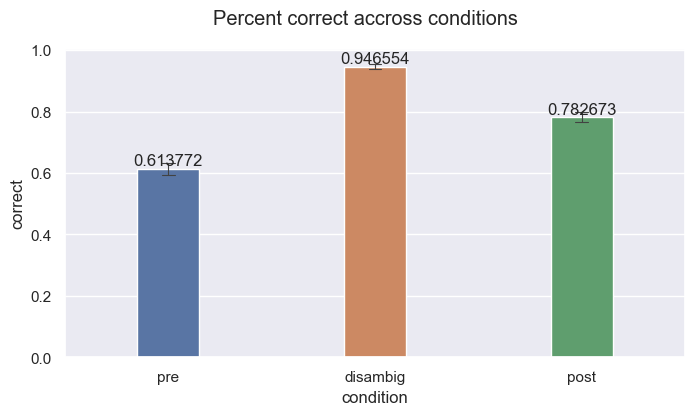

In [11]:
f,a = plt.subplots(figsize=(8,4))
bar = sns.barplot(x='condition', y='correct', data=df, errorbar='se', capsize=.06, width=.3, errwidth=.8)
bar.bar_label(bar.containers[0])
f.suptitle("Percent correct accross conditions")

### RTs in valid trials accross conditions

[(0.0, 3500.0)]

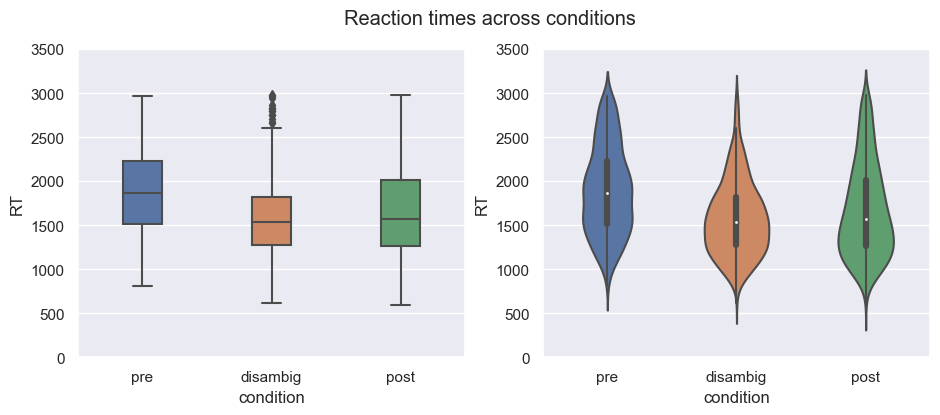

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11,4))

box = sns.boxplot(data=df, x='condition', y='RT', ax=ax1, width=.3)
violin = sns.violinplot(data=df, x='condition', y='RT', ax=ax2, width=.5, inner='box')

fig.suptitle("Reaction times across conditions")
ax1.set(ylim=(0,3500))
ax2.set(ylim=(0,3500))

### By category

#### Percent correct in valid trials accross conditions

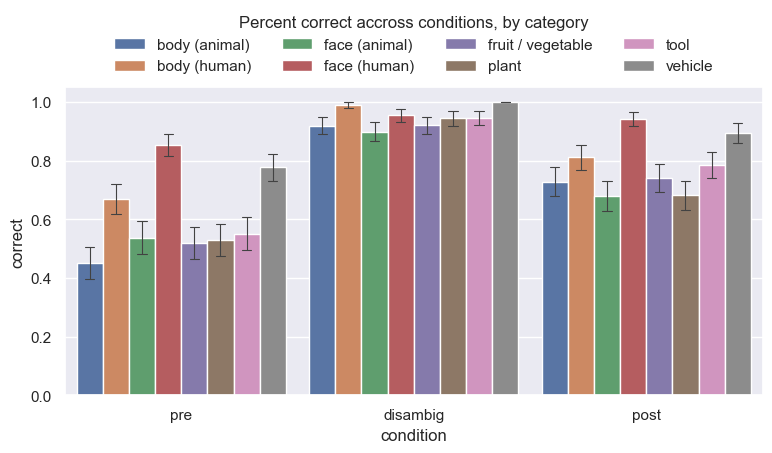

In [13]:
f,a = plt.subplots(figsize=(9,4))
sns.barplot(x='condition', y='correct', data=df, hue='category', hue_order=CATEGORIES, errorbar='se', capsize=.04, width=.9, errwidth=.8)
sns.move_legend(
    a, "lower center",
    bbox_to_anchor=(.5, 1), ncol=4, title="Percent correct accross conditions, by category", frameon=False,
)

#### RTs in valid trials accross conditions

Text(0.5, 0.98, 'Reaction times across conditions, by category')

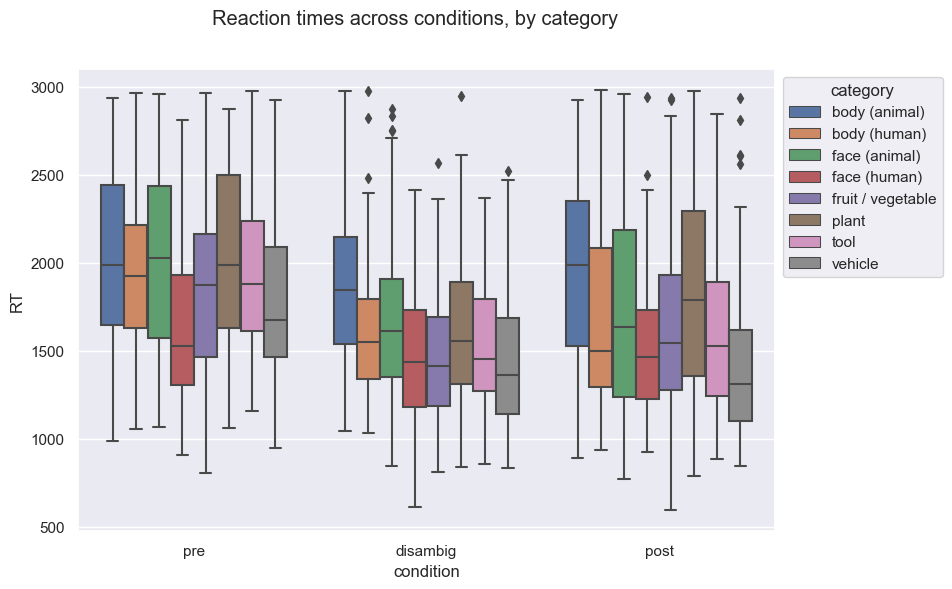

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
box = sns.boxplot(x='condition', y='RT', data=df, ax=ax, width=.8, hue='category', hue_order=CATEGORIES)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
fig.suptitle("Reaction times across conditions, by category")

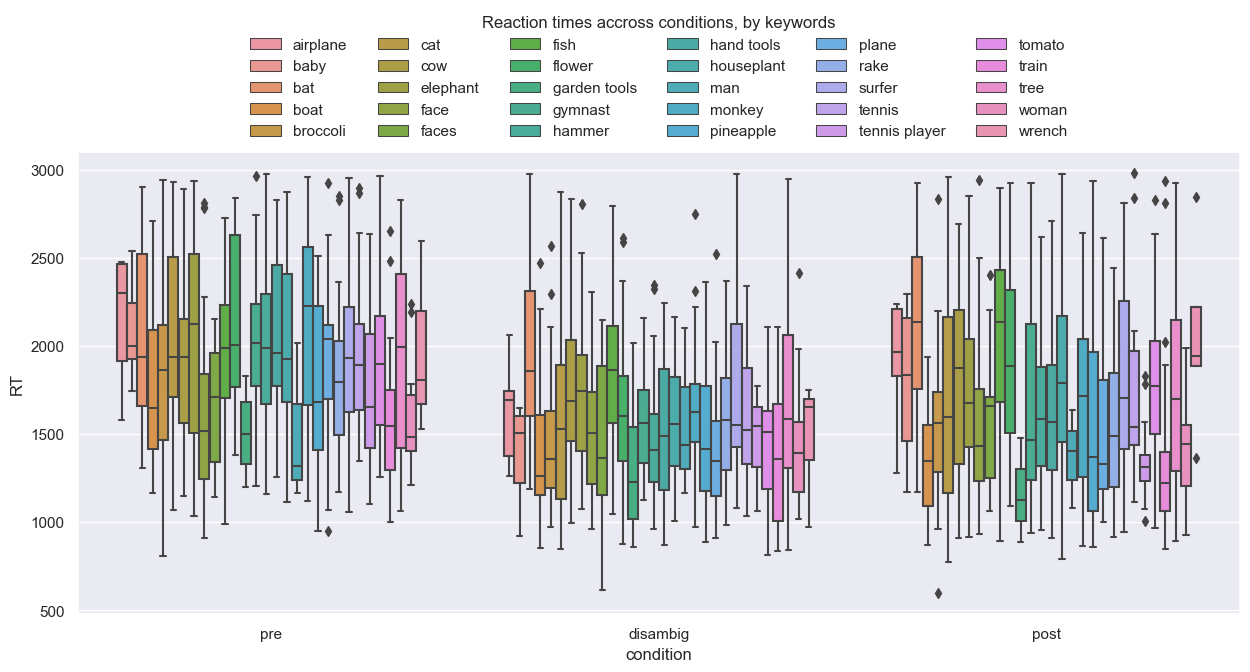

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
box = sns.boxplot(x='condition', y='RT', data=df, ax=ax, width=.8, hue='keyword', hue_order=KEYWORDS)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=6, title="Reaction times accross conditions, by keywords", frameon=False,
)

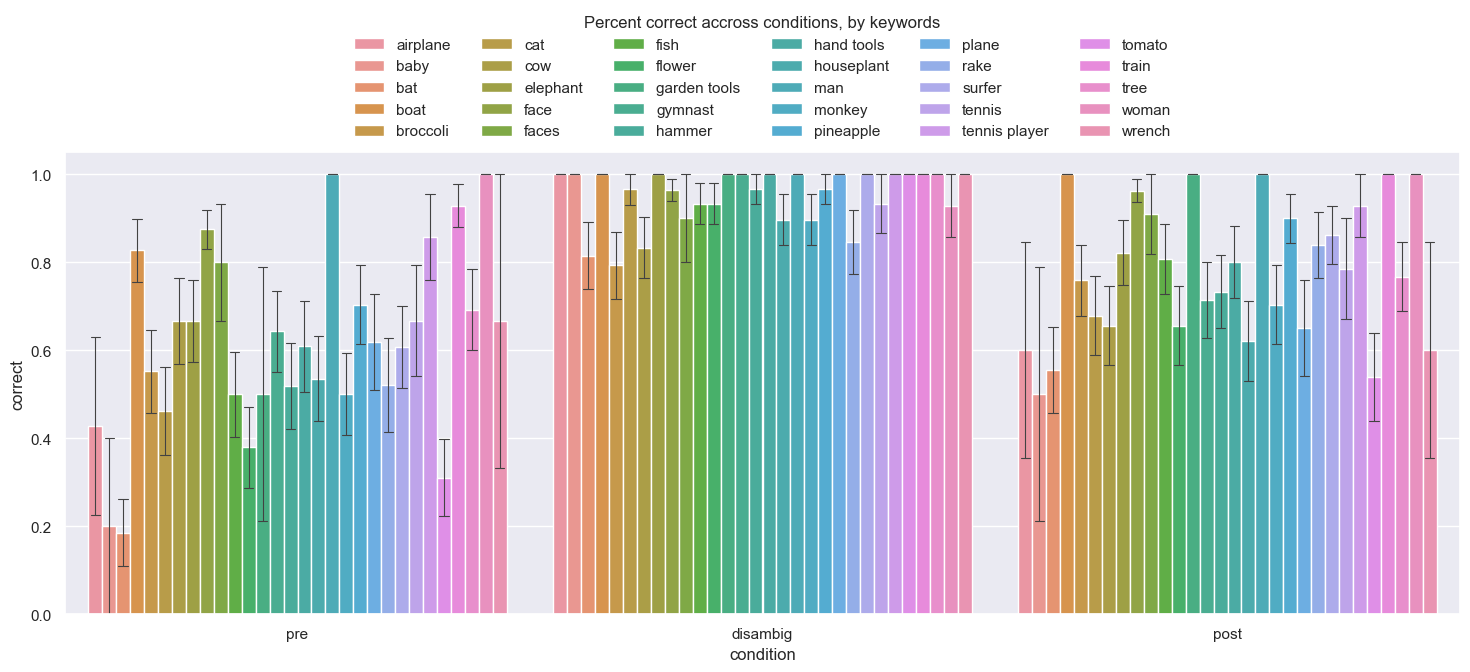

In [16]:
f,a = plt.subplots(figsize=(18,6))
sns.barplot(x='condition', y='correct', data=df, hue='keyword', hue_order=KEYWORDS, errorbar='se', capsize=.02, width=.9, errwidth=.8)
sns.move_legend(
    a, "lower center",
    bbox_to_anchor=(.5, 1), ncol=6, title="Percent correct accross conditions, by keywords", frameon=False,
)

#### ^ pool into groups (ideally same nr of search terms per cat)

In [17]:
df_mooney_pre = df[(df["condition"] == "pre")]
df_gray_disambig = df[(df["condition"] == "disambig")]
df_mooney_post = df[(df["condition"] == "post")]

In [18]:
print("PRE", df_mooney_pre.groupby("category").mean(numeric_only=True), "\n\n", 
    "POST", df_mooney_post.groupby("category").mean(numeric_only=True))

PRE                             RT   correct  incorrect  timeout
category                                                    
body (animal)      2033.158537  0.451220   0.548780      0.0
body (human)       1946.705882  0.670588   0.329412      0.0
face (animal)      2045.375000  0.537500   0.462500      0.0
face (human)       1617.829545  0.852273   0.147727      0.0
fruit / vegetable  1842.929412  0.517647   0.482353      0.0
plant              2017.783133  0.530120   0.469880      0.0
tool               1949.550000  0.550000   0.450000      0.0
vehicle            1770.235294  0.776471   0.223529      0.0 

 POST                             RT   correct  incorrect  timeout
category                                                    
body (animal)      1974.037037  0.728395   0.271605      0.0
body (human)       1680.341176  0.811765   0.188235      0.0
face (animal)      1722.964286  0.678571   0.321429      0.0
face (human)       1519.430233  0.941860   0.058140      0.0
fruit / vege

### confusion mtx

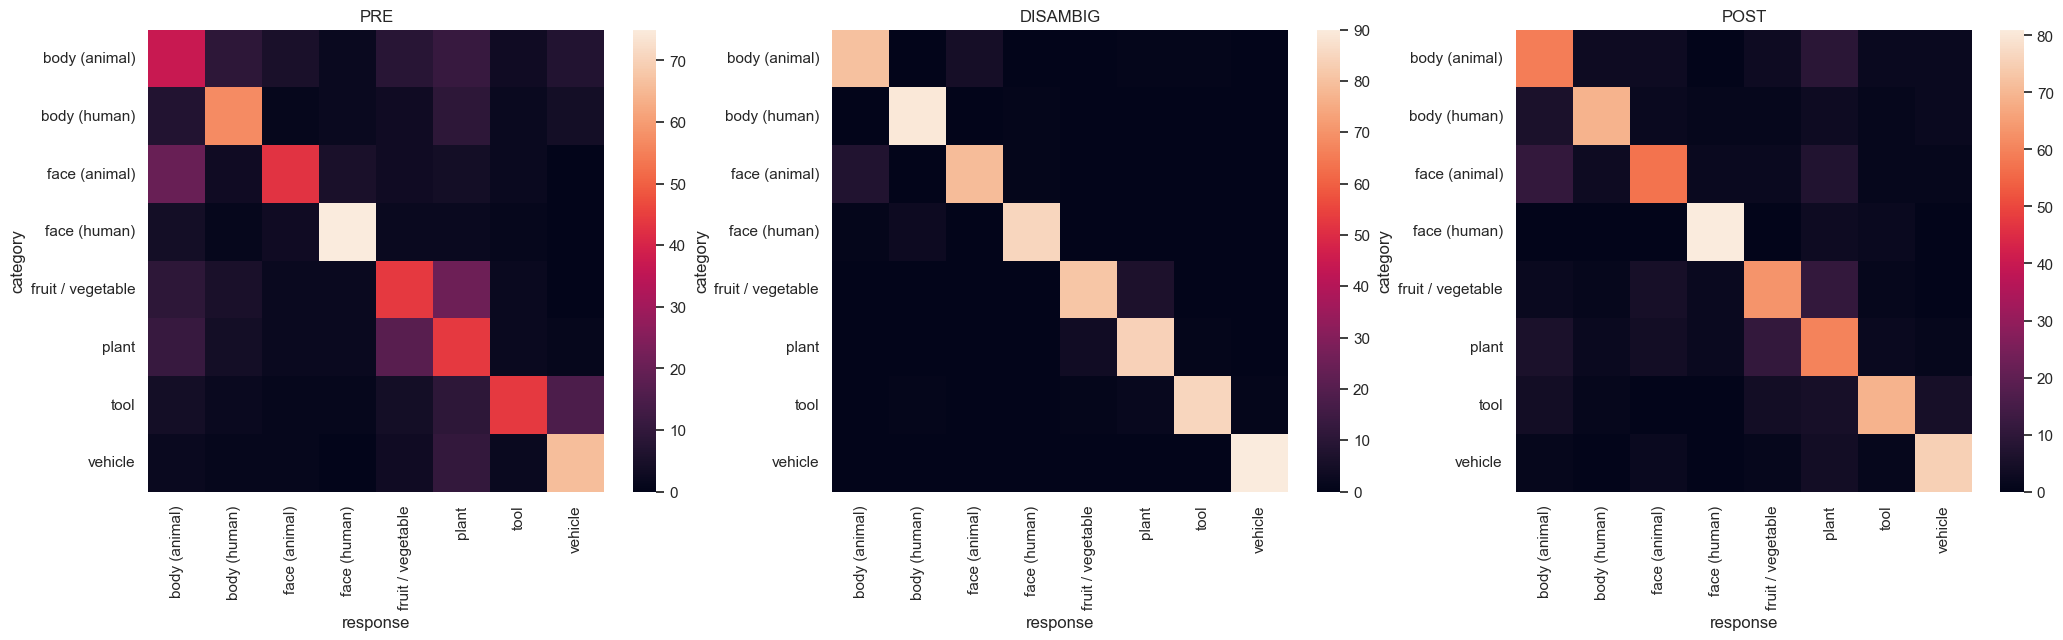

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,6))
for i, df_ in enumerate((df_mooney_pre, df_gray_disambig, df_mooney_post)):
    crosstab = pd.crosstab(df_['category'], df_['response'])
    sns.heatmap(crosstab, ax=ax[i]).set_title(("PRE", "DISAMBIG", "POST")[i])

### paired differences pre x post

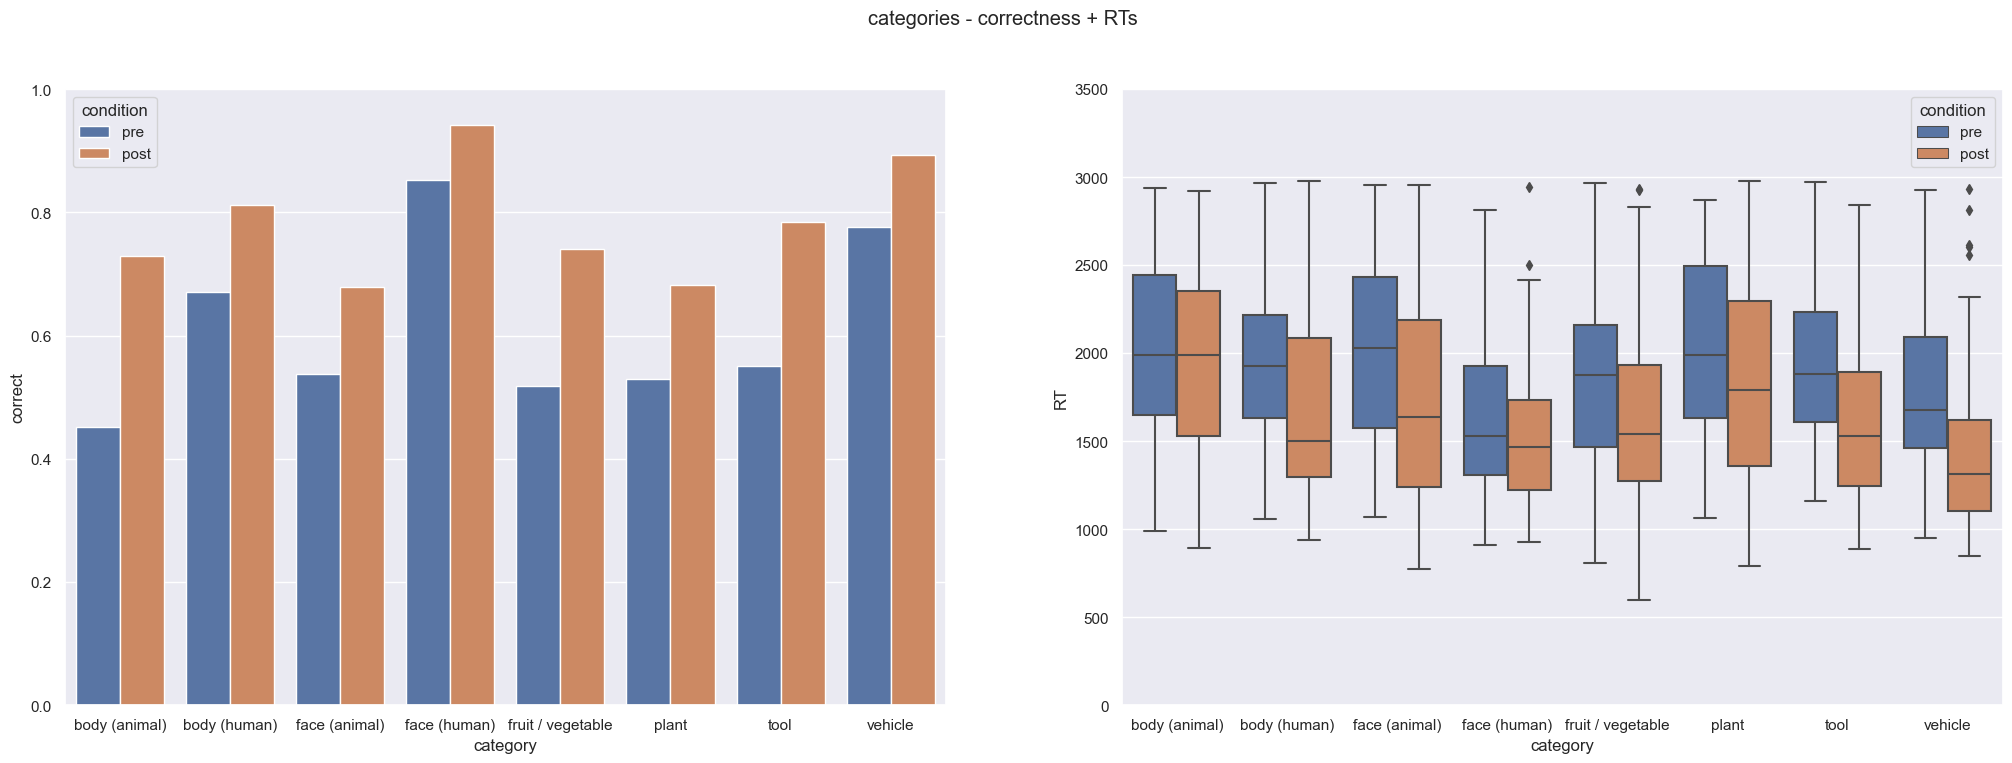

In [20]:
# % correct, RTs by category (paired)
plot_categories(pd.concat([df_mooney_pre, df_mooney_post]), 
                title="categories - correctness + RTs", 
                group=True)

/var/folders/zj/mv8z2fl52v172cdpjlkt5cj00000gn/T/ipykernel_69866/77405321.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[0].get_yticks()]);


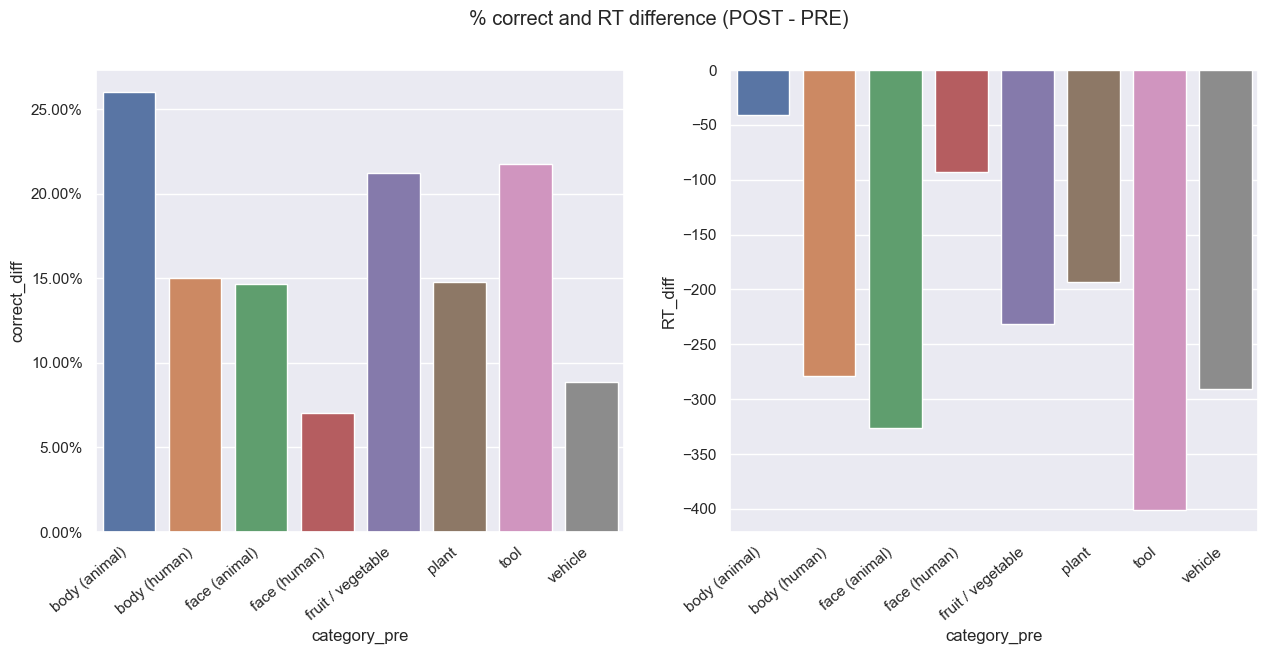

In [21]:
# paired difference - (pre - post) RT for each category, % correct
df_pre_post = pd.merge(left=df_mooney_pre, right=df_mooney_post, 
                        on='image', how='outer',
                        suffixes=('_pre', '_post'), 
                        # validate='1:1'
                        )
df_pre_post = (df_pre_post
                .assign(RT_diff=lambda x: x['RT_post'] - x['RT_pre'])
                .assign(correct_diff=lambda x: x['correct_post'] - x['correct_pre'])
                .loc[:, ['image', 'category_pre', 'RT_diff', 'correct_diff']]
            )

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
fig.suptitle("% correct and RT difference (POST - PRE)")
sns.barplot(data=df_pre_post, x='category_pre', y='RT_diff', order=CATEGORIES, errorbar=None, ax=ax[1])
sns.barplot(data=df_pre_post, x='category_pre', y='correct_diff', order=CATEGORIES, errorbar=None, ax=ax[0])

ax[0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[0].get_yticks()]);
for i in range(2):
    ax[i].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right");

### search terms (keywords) & images

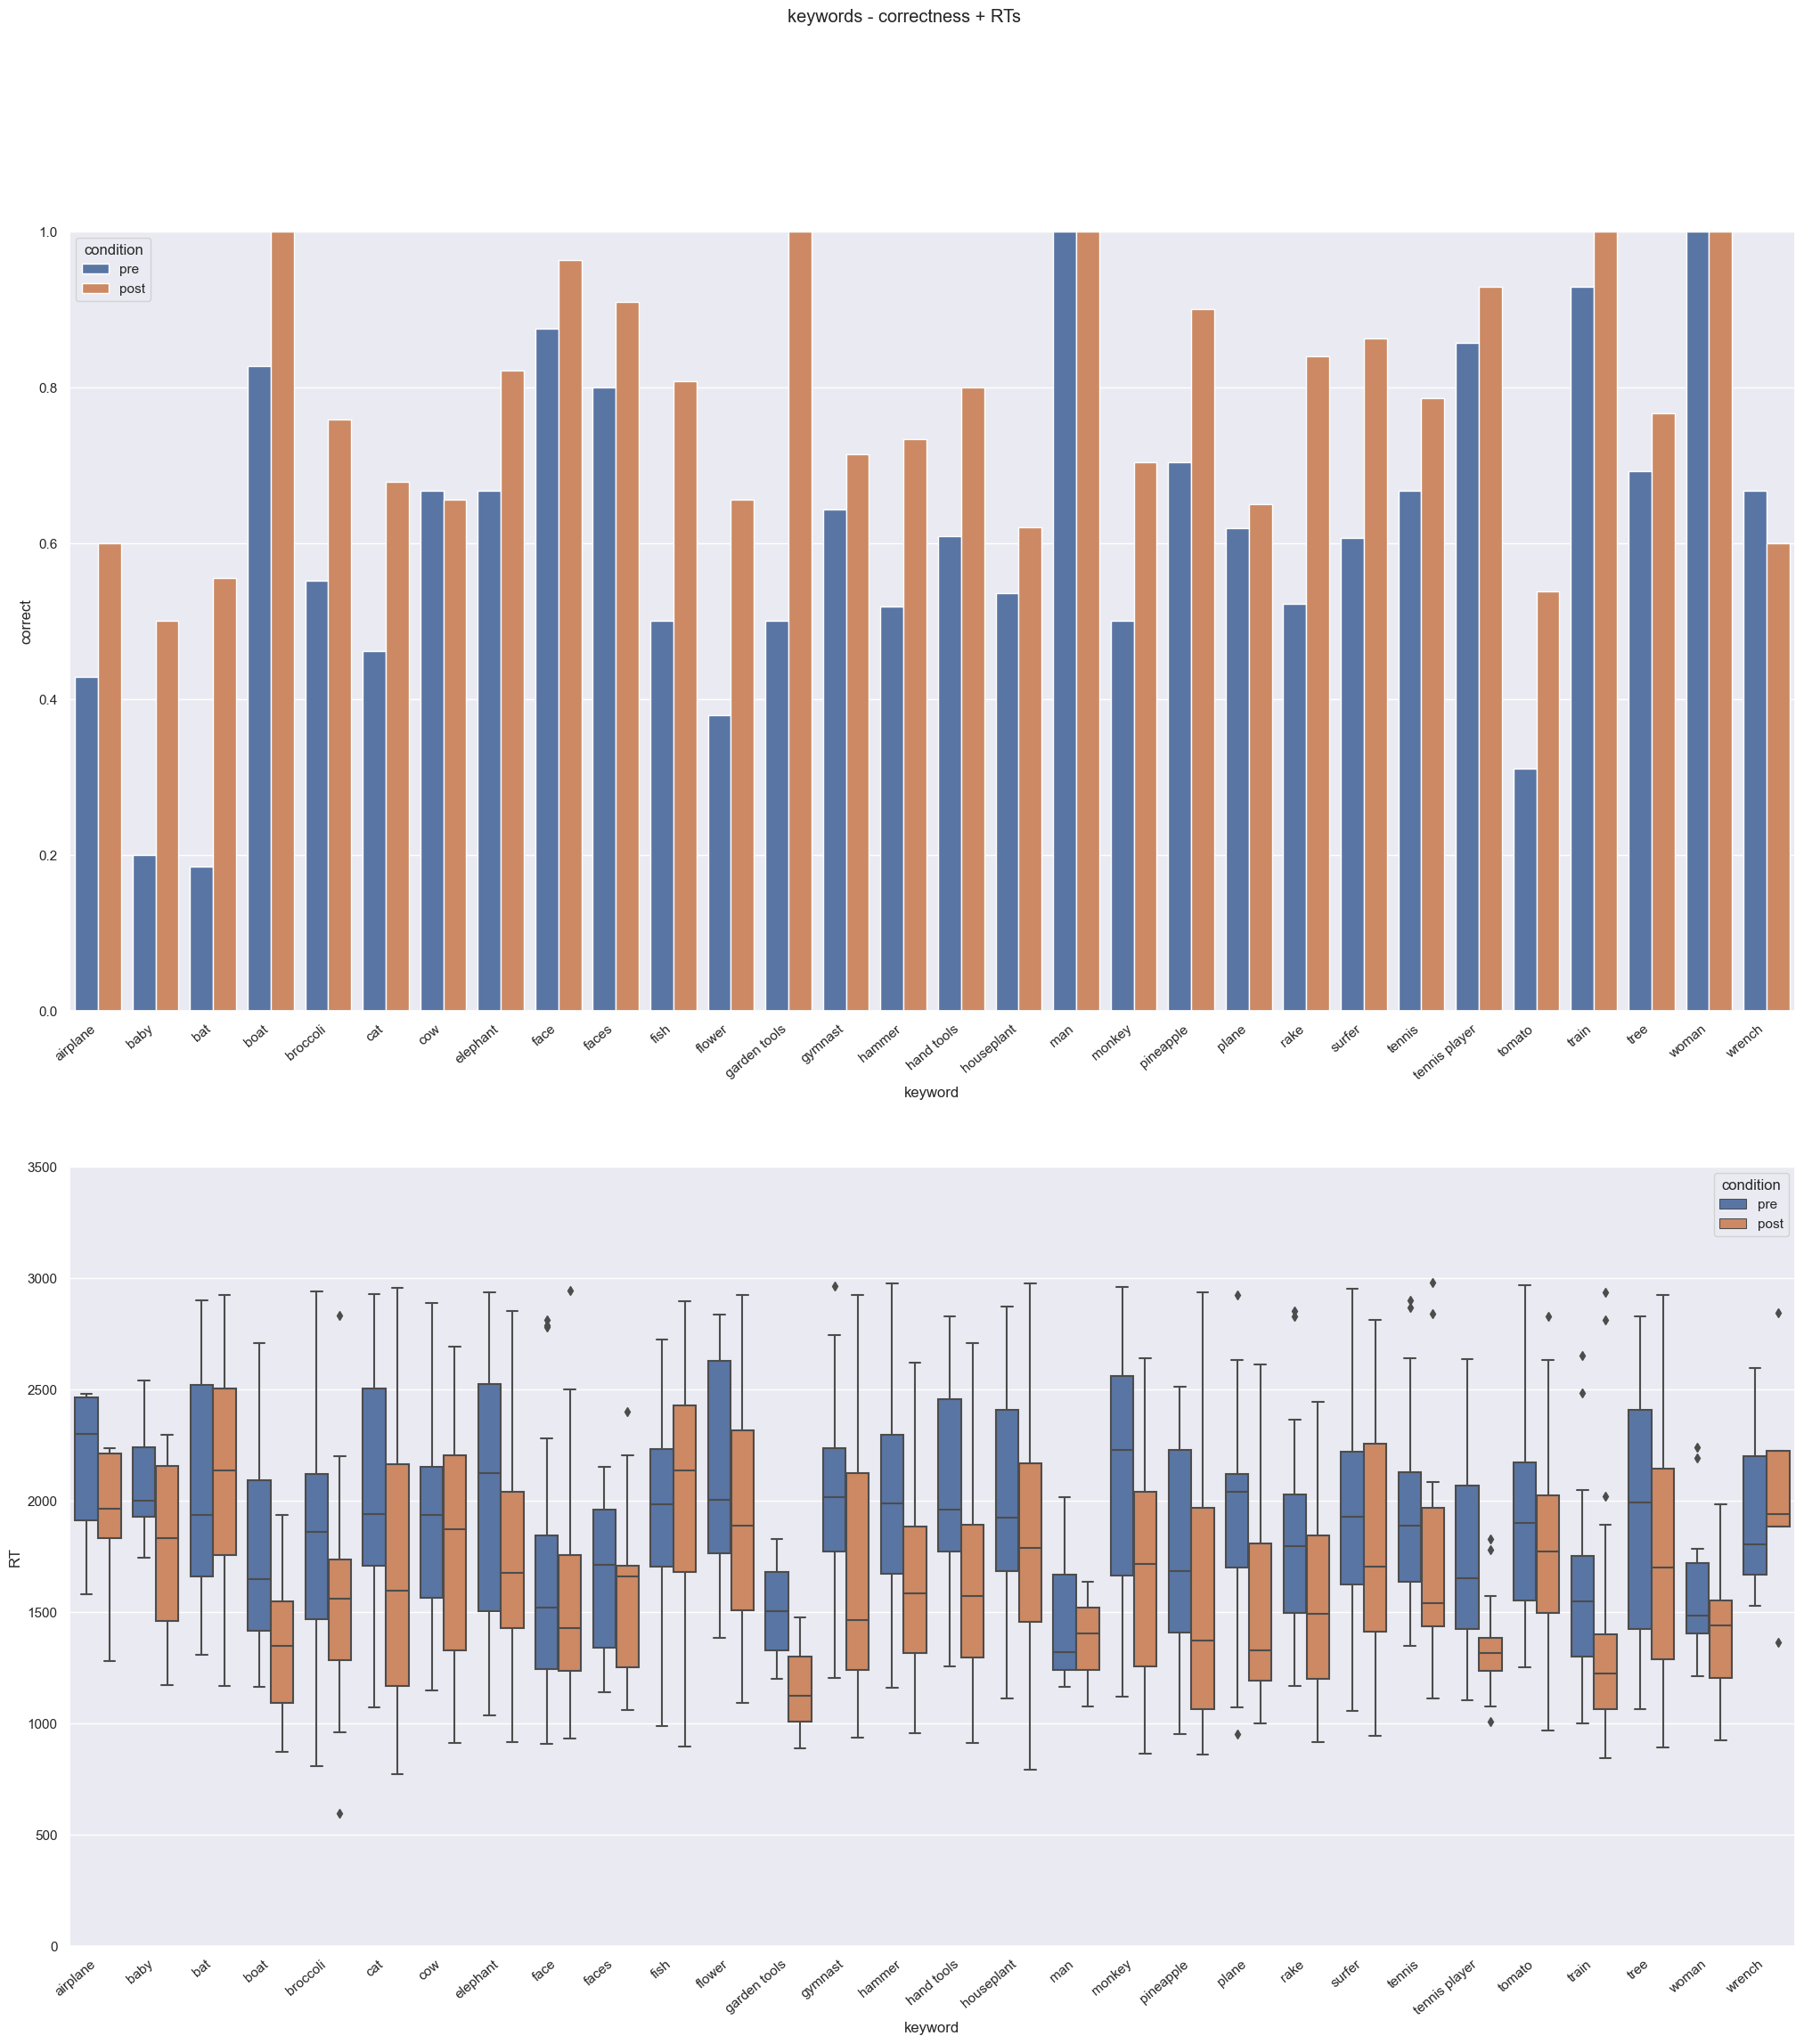

In [22]:
# PLOT for each search term (not subsearch)

plot_keywords(pd.concat([df_mooney_pre, df_mooney_post]), 
                title="keywords - correctness + RTs", 
                group=True)

## Disambiguated vs undisambiguated images

In [23]:
trials_disambig = pd.DataFrame()
trials_undisambig = pd.DataFrame()

for img in df.image.unique():

    if (img in df_gray_disambig.image.unique()) and (img in df_mooney_post.image.unique()):
        trial_gray = df_gray_disambig[df_gray_disambig.image == img]
        trial_post = df_mooney_post[df_mooney_post.image == img]
        # grayscale trial incorrect
        if (trial_gray.correct.values == 0):
            trials_undisambig = pd.concat([trials_undisambig, trial_post], ignore_index=True)
        # grayscale trial correct
        else:
            trials_disambig = pd.concat([trials_disambig, trial_post], ignore_index=True)

# print(f"")

print(trials_disambig.describe())
print(trials_undisambig.describe())

                RT     correct   incorrect  timeout
count   634.000000  634.000000  634.000000    634.0
mean   1663.296530    0.801262    0.198738      0.0
std     523.405588    0.399366    0.399366      0.0
min     596.000000    0.000000    0.000000      0.0
25%    1254.500000    1.000000    0.000000      0.0
50%    1556.000000    1.000000    0.000000      0.0
75%    2000.500000    1.000000    0.000000      0.0
max    2977.000000    1.000000    1.000000      0.0
                RT    correct  incorrect  timeout
count    38.000000  38.000000  38.000000     38.0
mean   1767.289474   0.552632   0.447368      0.0
std     556.731723   0.503897   0.503897      0.0
min     791.000000   0.000000   0.000000      0.0
25%    1302.000000   0.000000   0.000000      0.0
50%    1674.000000   1.000000   0.000000      0.0
75%    2208.000000   1.000000   1.000000      0.0
max    2979.000000   1.000000   1.000000      0.0


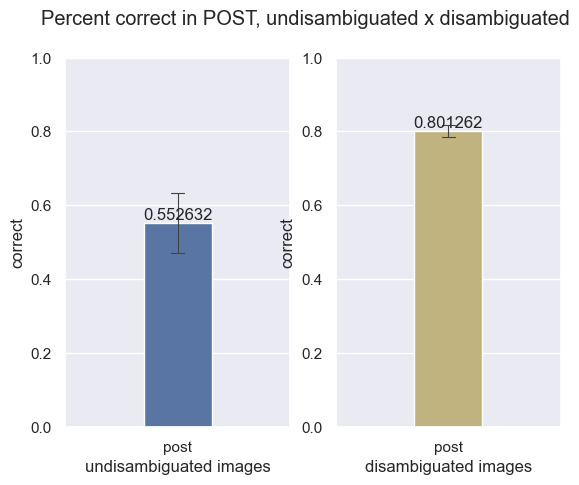

In [24]:
f, a = plt.subplots(nrows=1, ncols=2)

sns.barplot(data=trials_undisambig, x='condition', y='correct', ax=a[0], errorbar='se', capsize=.06, width=.3, errwidth=.8)
sns.barplot(data=trials_disambig, x='condition', y='correct', ax=a[1], errorbar='se', capsize=.06, width=.3, errwidth=.8, color='y')
f.suptitle("Percent correct in POST, undisambiguated x disambiguated")
a[0].set(xlabel="undisambiguated images", ylim=(0,1))
a[1].set(xlabel="disambiguated images", ylim=(0,1))

for c, c_ in zip(a[0].containers, a[1].containers):
    a[0].bar_label(c)
    a[1].bar_label(c_)


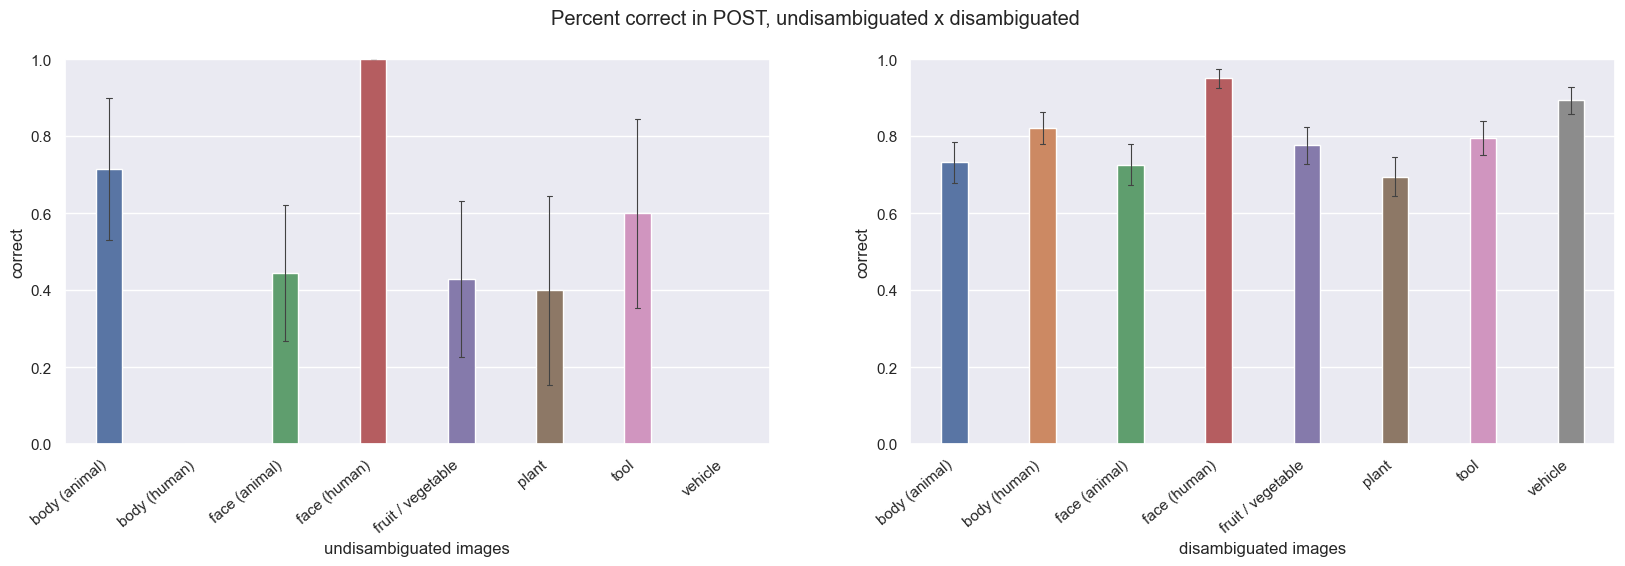

In [25]:
f, a = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.barplot(data=trials_undisambig, x='category', y='correct', ax=a[0], errorbar='se', capsize=.06, width=.3, errwidth=.8, order=CATEGORIES)
sns.barplot(data=trials_disambig, x='category', y='correct', ax=a[1], errorbar='se', capsize=.06, width=.3, errwidth=.8, order=CATEGORIES)
f.suptitle("Percent correct in POST, undisambiguated x disambiguated")
a[0].set(xlabel="undisambiguated images", ylim=(0,1))
a[1].set(xlabel="disambiguated images", ylim=(0,1))

for i in range(2):
    a[i].set_xticklabels(a[i].get_xticklabels(), rotation=40, ha="right");
# for c, c_ in zip(a[0].containers, a[1].containers):
#     a[0].bar_label(c)
#     a[1].bar_label(c_)

[Text(0.5, 0, 'disambiguated images'), (0.0, 3000.0)]

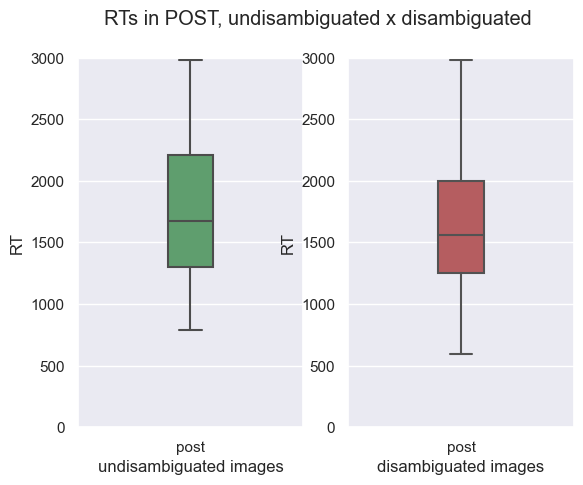

In [26]:
f, a = plt.subplots(nrows=1, ncols=2)

# sns.barplot(data=trials_undisambig, x='condition', y='RT', ax=a[0], errorbar='se', capsize=.06, width=.3, errwidth=.8)
sns.boxplot(data=trials_undisambig, x='condition', y='RT', ax=a[0], width=.2, color='g')
sns.boxplot(data=trials_disambig, x='condition', y='RT', ax=a[1], width=.2, color='r')
f.suptitle("RTs in POST, undisambiguated x disambiguated")
a[0].set(xlabel="undisambiguated images", ylim=(0,3000))
a[1].set(xlabel="disambiguated images", ylim=(0,3000))

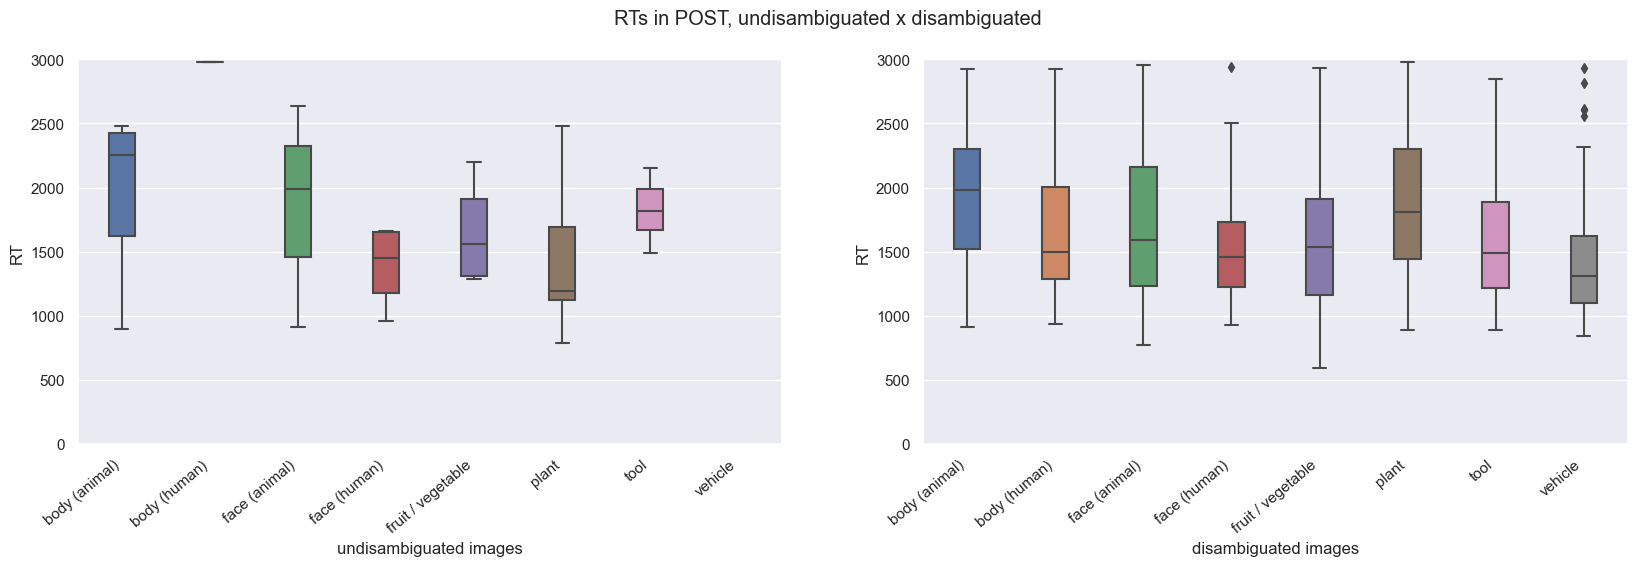

In [27]:
f, a = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# sns.barplot(data=trials_undisambig, x='condition', y='RT', ax=a[0], errorbar='se', capsize=.06, width=.3, errwidth=.8)
sns.boxplot(data=trials_undisambig, x='category', y='RT', ax=a[0], width=.3, order=CATEGORIES)
sns.boxplot(data=trials_disambig, x='category', y='RT', ax=a[1], width=.3, order=CATEGORIES)
f.suptitle("RTs in POST, undisambiguated x disambiguated")
a[0].set(xlabel="undisambiguated images", ylim=(0,3000))
a[1].set(xlabel="disambiguated images", ylim=(0,3000))


for i in range(2):
    a[i].set_xticklabels(a[i].get_xticklabels(), rotation=40, ha="right");

## Overview accross blocks

Text(0.5, 0.98, 'Percent correct accross blocks')

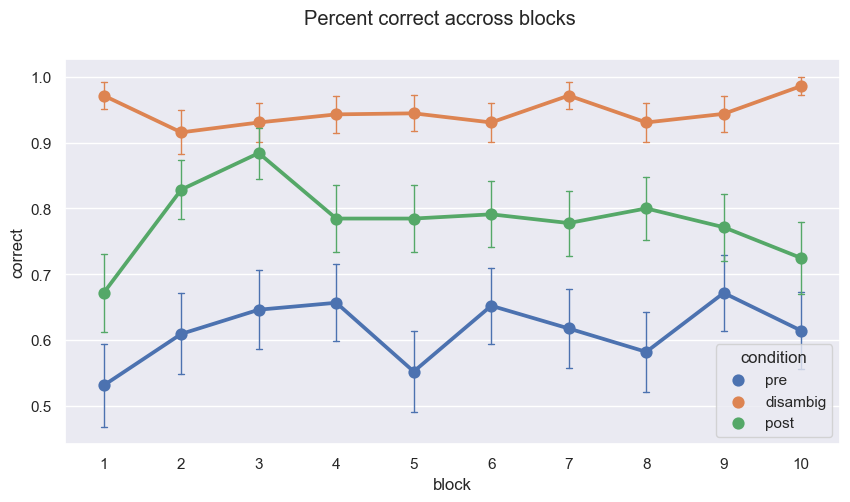

In [28]:
f, a = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
sns.pointplot(data=df, x='block', y='correct', hue='condition', errorbar='se', capsize=.08, errwidth=1, ax=a)
f.suptitle("Percent correct accross blocks")

Text(0.5, 0.98, 'RTs accross blocks')

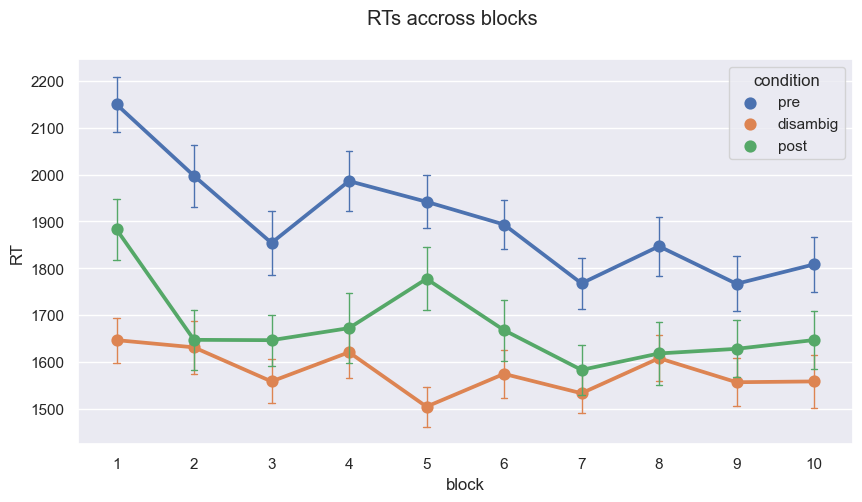

In [29]:
f, a = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
sns.pointplot(data=df, x='block', y='RT', hue='condition', errorbar='se', capsize=.08, errwidth=1, ax=a)
f.suptitle("RTs accross blocks")

Text(0.5, 0.98, 'Invalid trials (timeout) accross blocks')

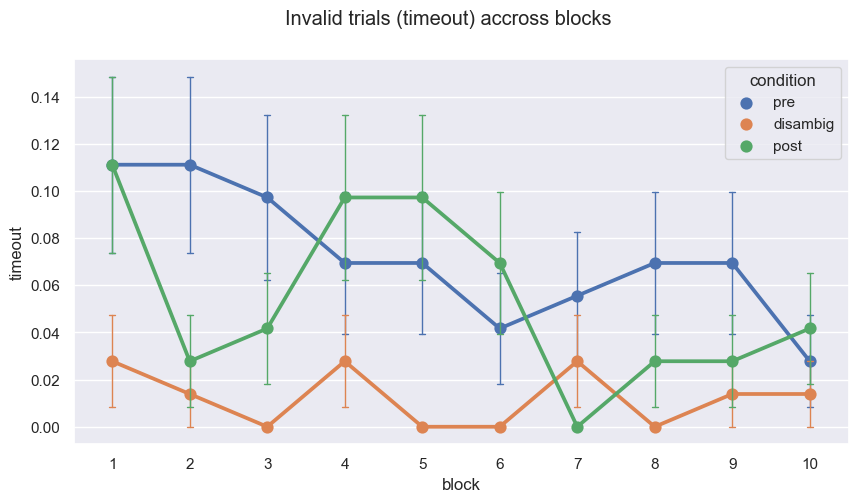

In [30]:
f, a = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
sns.pointplot(data=df_to, x='block', y='timeout', hue='condition', errorbar='se', capsize=.08, errwidth=1, ax=a)
f.suptitle("Invalid trials (timeout) accross blocks")